<a href="https://colab.research.google.com/github/NoharMarcus/Snake_On_Fpga/blob/main/image_converter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import sys
np.set_printoptions(threshold=sys.maxsize)
np.set_printoptions(formatter={'int':hex})
'''
if len(sys.argv) != 5:
    print("Error: required 4 arguments but provided %s arguments." % str(len(sys.argv) - 1))
    print("Usage: python img2v.py OUT_MODE SIZE_X SIZE_Y IMAGE_FILENAME > OUT_FILENAME.v" )
    print("       OUT_MODE=0      For use in a case statement" )
    print("       OUT_MODE=1      For use in an initial block" )
    print("       SIZE_X, SIZE_Y  Image will be scaled to this size in pixels" )
    print("Example: python img2v.py 0 16 16 mario.jpg > rom.v" )
    quit()   '''

IMAGE_FILENAME = "/content/greendot.png" # input image file name
IMAGE_SHAPE = (int(32),int(32))
MODE = 1

def dec2hex(x, length):
    # remove "0b" from string
    tmp = hex(x)[2:]
    # append leading 0s if four binary bits are not present
    for i in range(0, length - len(tmp)):
        tmp = "0" + tmp
    return tmp
img = cv2.imread(IMAGE_FILENAME)
if img is None:
    print("Error: %s cannot be read." % (IMAGE_FILENAME))
    quit()
# crop image to square
# if height is greater than width, crop height same length as width
if img.shape[0] > img.shape[1]:
    midpoint = int(img.shape[0]/2)
    left = midpoint-int(img.shape[1]/2)
    right = midpoint+int(img.shape[1]/2)
    img = img[left:right,:,:]
# if width is greater than height, make width same length as height
elif img.shape[1] > img.shape[0]:
    midpoint = int(img.shape[1]/2)
    left = midpoint-int(img.shape[0]/2)
    right = midpoint+int(img.shape[0]/2)
    img = img[:,left:right,:]
# resize image to 32x32
img = cv2.resize(img, IMAGE_SHAPE)
grid = [[""] * (IMAGE_SHAPE[0])] * (IMAGE_SHAPE[1])
array = np.empty((IMAGE_SHAPE[0], IMAGE_SHAPE[1]), dtype=np.int16)
for row in range(img.shape[0]):
  for col in range(img.shape[1]):
    num = 256*int(15*img[row][col][2]/255)+16*int(15*img[row][col][1]/255)+int(15*img[row][col][0]/255)
    array[row][col] = num
print("{")
for row in range(array.shape[0]):
  print("{",end=" ")
  for col in range(array.shape[1]):
    if(col>0):
      print(",",end=" ")
    print("12'h"+dec2hex(array[row][col],3),end=" ")
  print("},")
print("};")

{
{ 12'h000 , 12'h000 , 12'h000 , 12'h000 , 12'h000 , 12'h000 , 12'h000 , 12'h000 , 12'h000 , 12'h000 , 12'h000 , 12'h000 , 12'h000 , 12'h000 , 12'h000 , 12'h000 , 12'h000 , 12'h000 , 12'h000 , 12'h000 , 12'h000 , 12'h000 , 12'h000 , 12'h000 , 12'h000 , 12'h000 , 12'h000 , 12'h000 , 12'h000 , 12'h000 , 12'h000 , 12'h000 },
{ 12'h000 , 12'h000 , 12'h000 , 12'h000 , 12'h000 , 12'h000 , 12'h000 , 12'h000 , 12'h000 , 12'h000 , 12'h000 , 12'h000 , 12'h000 , 12'h000 , 12'h000 , 12'h000 , 12'h000 , 12'h000 , 12'h000 , 12'h000 , 12'h000 , 12'h000 , 12'h000 , 12'h000 , 12'h000 , 12'h000 , 12'h000 , 12'h000 , 12'h000 , 12'h000 , 12'h000 , 12'h000 },
{ 12'h000 , 12'h000 , 12'h000 , 12'h000 , 12'h000 , 12'h000 , 12'h000 , 12'h000 , 12'h000 , 12'h000 , 12'h000 , 12'h000 , 12'h000 , 12'h000 , 12'h000 , 12'h000 , 12'h000 , 12'h000 , 12'h000 , 12'h000 , 12'h000 , 12'h000 , 12'h000 , 12'h000 , 12'h000 , 12'h000 , 12'h000 , 12'h000 , 12'h000 , 12'h000 , 12'h000 , 12'h000 },
{ 12'h000 , 12'h000 , 12'h000

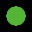

In [ ]:
cv2_imshow(img)